In [2]:
# Main dependencies
import numpy
import numpy as np
import scipy.fftpack

import matplotlib
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [3]:
def fftind(size):
    """ Returns a numpy array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            size (integer): The size of the coordinate array to create
        Returns:
            k_ind, numpy array of shape (2, size, size) with:
                k_ind[0,:,:]:  k_x components
                k_ind[1,:,:]:  k_y components
                
        Example:
        
            print(fftind(5))
            
            [[[ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]]
            [[ 0  0  0  0  0]
            [ 1  1  1  1  1]
            [-3 -3 -3 -3 -3]
            [-2 -2 -2 -2 -2]
            [-1 -1 -1 -1 -1]]]
            
        """
    k_ind = numpy.mgrid[:size, :size] - int( (size + 1)/2 )
    k_ind = scipy.fftpack.fftshift(k_ind)
    return( k_ind )



def gaussian_random_field(alpha = 3.0,
                          size = 128, 
                          flag_normalize = True):
    """ Returns a numpy array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            alpha (double, default = 3.0): 
                The power of the power-law momentum distribution
            size (integer, default = 128):
                The size of the square output Gaussian Random Fields
            flag_normalize (boolean, default = True):
                Normalizes the Gaussian Field:
                    - to have an average of 0.0
                    - to have a standard deviation of 1.0
        Returns:
            gfield (numpy array of shape (size, size)):
                The random gaussian random field
                
        Example:
        import matplotlib
        import matplotlib.pyplot as plt
        example = gaussian_random_field()
        plt.imshow(example)
        """
        
        # Defines momentum indices
    k_idx = fftind(size)

        # Defines the amplitude as a power law 1/|k|^(alpha/2)
    amplitude = numpy.power( k_idx[0]**2 + k_idx[1]**2 + 1e-10, -alpha/4.0 )
    amplitude[0,0] = 0
    
        # Draws a complex gaussian random noise with normal
        # (circular) distribution
    noise = numpy.random.normal(size = (size, size)) \
        + 1j * numpy.random.normal(size = (size, size))
    
        # To real space
    gfield = numpy.fft.ifft2(noise * amplitude).real
    
        # Sets the standard deviation to one
    if flag_normalize:
        gfield = gfield - numpy.mean(gfield)
        gfield = gfield/numpy.std(gfield)
        
    return gfield, amplitude

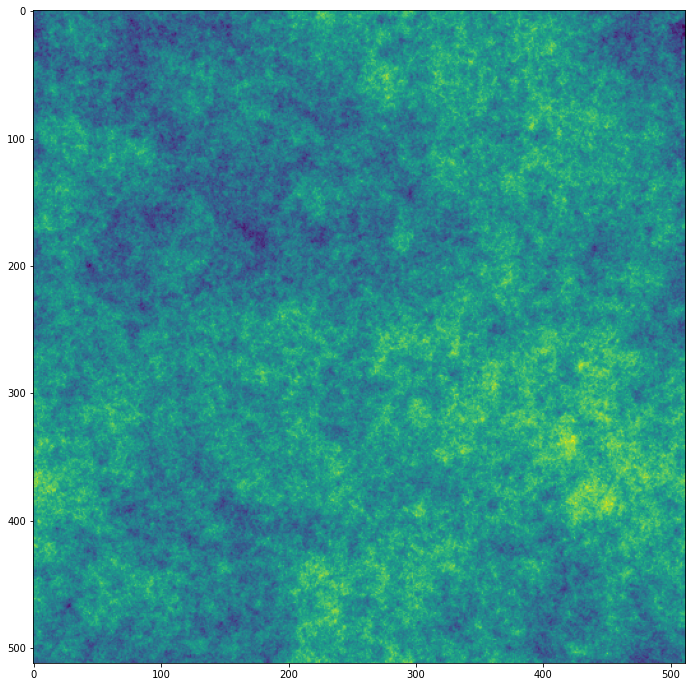

mean:  -5.637851296924623e-18
std:  0.9999999999999999


In [4]:
example,amplitude = gaussian_random_field(alpha=2,size=512)
plt.figure(figsize=(12,12))
plt.imshow(example)
plt.show()
print('mean: ', numpy.mean(example))
print('std: ', numpy.std(example))

In [5]:
## Now try convolve this Gaussian field with a scattering network
from kymatio.numpy import Scattering2D

In [6]:
scattering = Scattering2D(J=4, shape=(512, 512))

In [7]:
scattered=scattering(example)

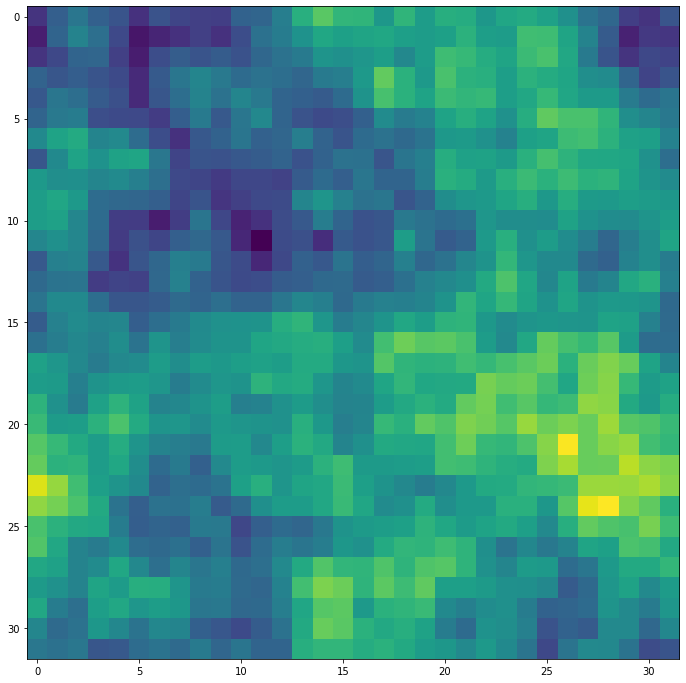

In [8]:
plt.figure(figsize=(12,12))
plt.imshow(scattered[0])
plt.show()

In [9]:
scattered

array([[[-1.47176423, -0.80635427, -0.4189953 , ..., -1.31281028,
         -1.46209691, -0.9833943 ],
        [-1.76226616, -0.72303961, -0.18354802, ..., -1.71204803,
         -1.39300525, -1.42836392],
        [-1.46869578, -1.17298954, -0.71788932, ..., -1.46515919,
         -1.18011925, -1.24452046],
        ...,
        [ 0.48351408, -0.29840697, -0.52730124, ..., -0.08110951,
         -0.31386418,  0.17212601],
        [-0.1300186 , -0.61685798, -0.48859226, ..., -0.07157281,
         -0.65488982, -0.11247781],
        [-0.40302787, -0.49636782, -0.40126554, ..., -0.4605841 ,
         -1.10804996, -0.98940484]],

       [[ 0.10499723,  0.09049736,  0.09371123, ...,  0.09506549,
          0.09745877,  0.10034108],
        [ 0.10528824,  0.10200401,  0.09085005, ...,  0.10057573,
          0.09138946,  0.10985965],
        [ 0.11024731,  0.10754473,  0.09579218, ...,  0.10325117,
          0.08612015,  0.09099366],
        ...,
        [ 0.10046435,  0.0925499 ,  0.09776563, ...,  